# Importing Modules
- logistic regression
- knn
- decision tree
- random forest
- voting


In [1]:
# Basic & visualization modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn modules
from sklearn import tree
from sklearn.preprocessing import LabelEncoder as le                    # label encoder
from sklearn.model_selection import train_test_split                    # train & test split 
from sklearn.preprocessing import RobustScaler as rbScaler              # robust scaler
from sklearn.ensemble import VotingClassifier as voClassifier           # voting
from sklearn.tree  import DecisionTreeClassifier as dtClassifier        # decision tree
from sklearn.neighbors import KNeighborsClassifier as knnClassifier     # knn
from sklearn.ensemble import RandomForestClassifier as rfClassifier     # random forest
from sklearn.linear_model import LogisticRegression as lgrClassifier    # logistic regression

# Reading the CSV file

In [2]:
data = pd.read_csv("train.csv", encoding = "utf-8" , sep = ",", low_memory=False)

# Displaying the Data

In [3]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


# Summary

- ID: Represents a unique identification of an entry
- Customer_ID: Represents a unique identification of a person
- Month: Represents the month of the year
- Name: Represents the name of a person
- Age: Represents the age of the person
- SSN: Represents the social security number of a person
- Occupation: Represents the occupation of the person
- Annual_Income: Represents the annual income of the person
- Monthly_Inhand_Salary: Represents the monthly base salary of a person
- Num_Bank_Accounts: Represents the number of bank accounts a person holds
- Num_Credit_Card: Represents the number of other credit cards held by a person
- Interest_Rate: Represents the interest rate on credit card
- Num_of_Loan: Represents the number of loans taken from the bank
- Type_of_Loan: Represents the types of loan taken by a person
- Delay_from_due_date: Represents the average number of days delayed from the payment date
- Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
- Changed_Credit_Limit: Represents the percentage change in credit card limit
- Num_Credit_Inquiries: Represents the number of credit card inquiries
- Credit_Mix: Represents the classification of the mix of credits
- Outstanding_Debt: Represents the remaining debt to be paid (in USD)
- Credit_Utilization_Ratio: Represents the utilization ratio of credit card
- Credit_History_Age: Represents the age of credit history of the person
- Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
- Total_EMI_per_month: Represents the monthly EMI payments (in USD)
- Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
- Payment_Behaviour: Represents the payment behavior of the customer (in USD)
- Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

# Exploring Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


On average, individuals have around 17 bank accounts, with a wide standard deviation of approximately 117.4, indicating significant variation. The minimum number of bank accounts observed is -1, which is likely an error or missing value, and should be treated accordingly.


The average number of credit cards per individual is approximately 22.47, with a standard deviation of 129.06, indicating significant variability in credit card ownership.
The maximum number of credit cards observed is 1499, which could be an outlier and needs further investigation.

The average total EMI per month is approximately $1403.12, with a wide standard deviation of $8306.04, suggesting significant variability in EMI amounts among individuals.
The maximum EMI observed is $82331, which is substantially higher than the mean and median values and warrants further investigation for potential outliers.

In [6]:
data.describe(include="object")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [7]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

<Axes: >

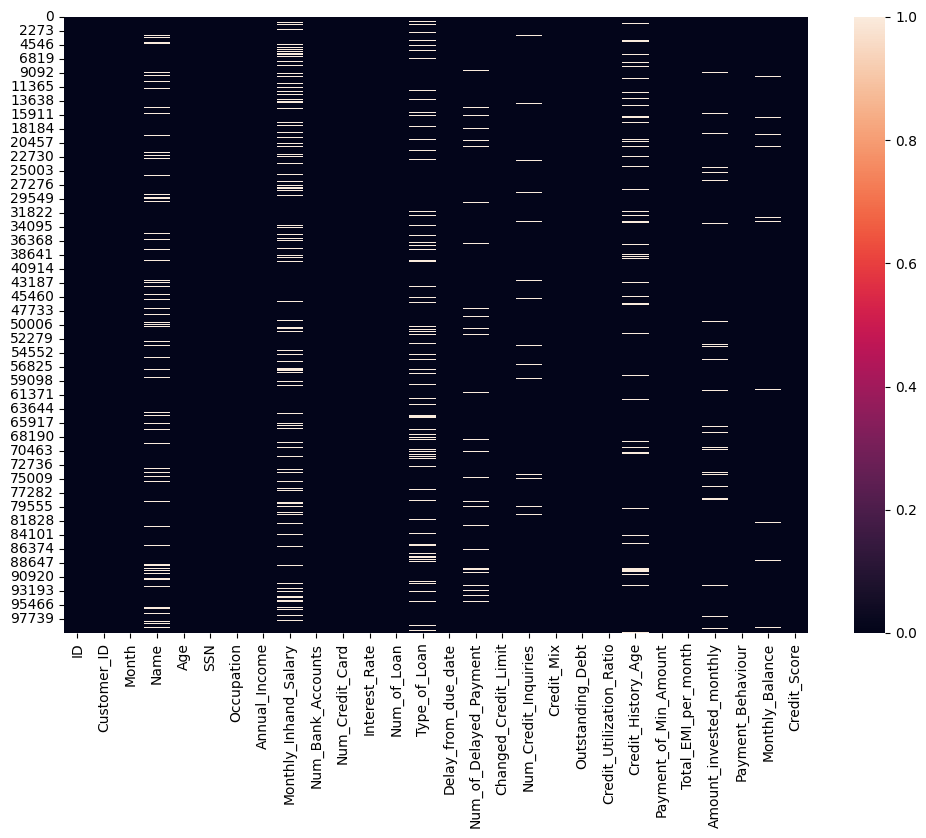

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull())

In [9]:
numCols = ['Monthly_Inhand_Salary', 'Delay_from_due_date', 'Credit_Utilization_Ratio']

<Figure size 1800x600 with 0 Axes>

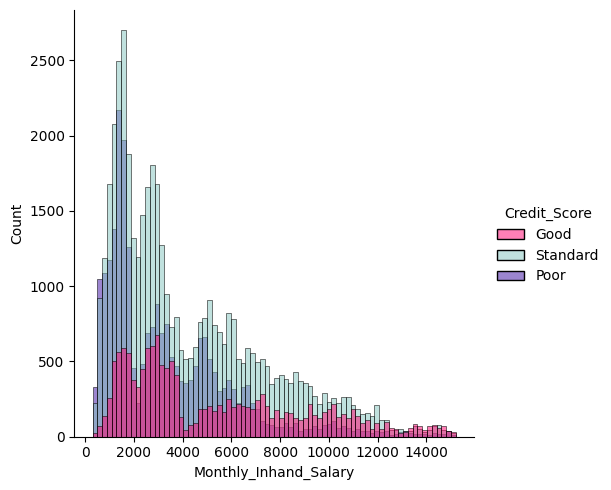

<Figure size 1800x600 with 0 Axes>

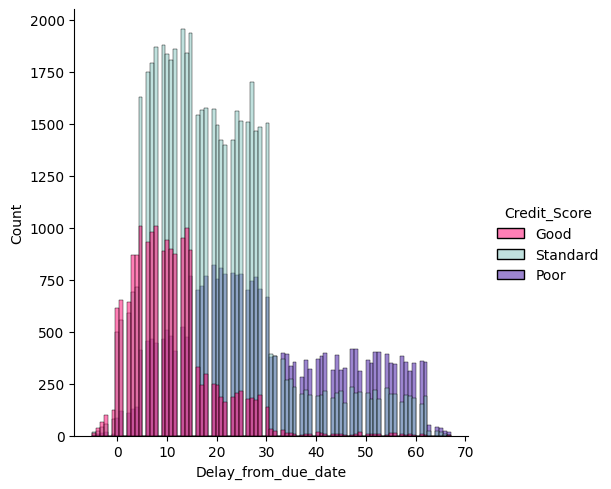

<Figure size 1800x600 with 0 Axes>

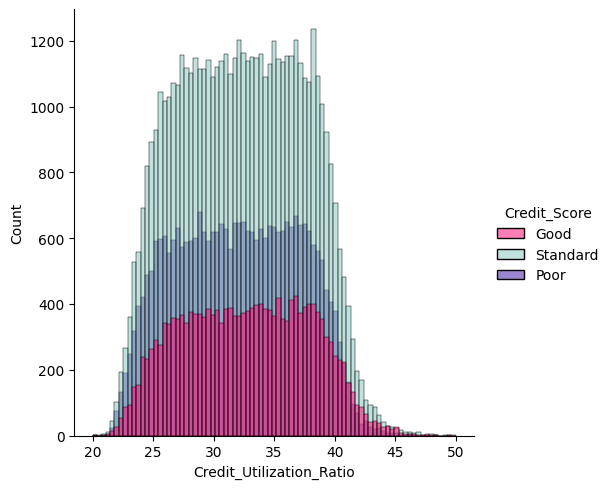

In [10]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=data, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"])
    plt.show()

In [11]:
objCols = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

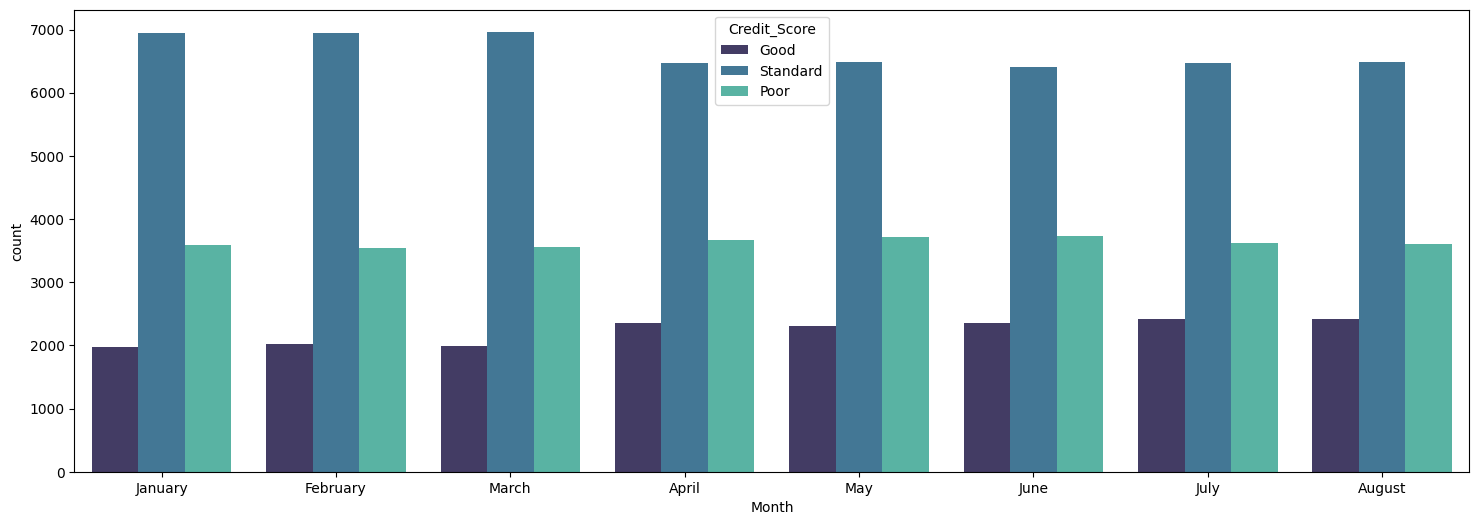

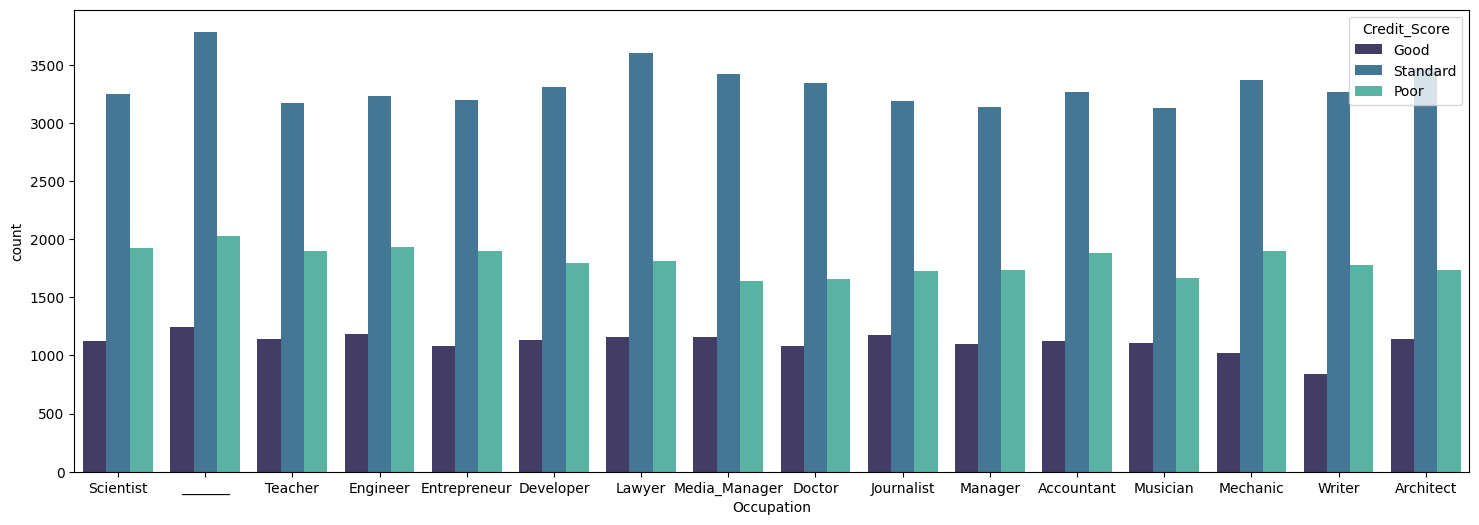

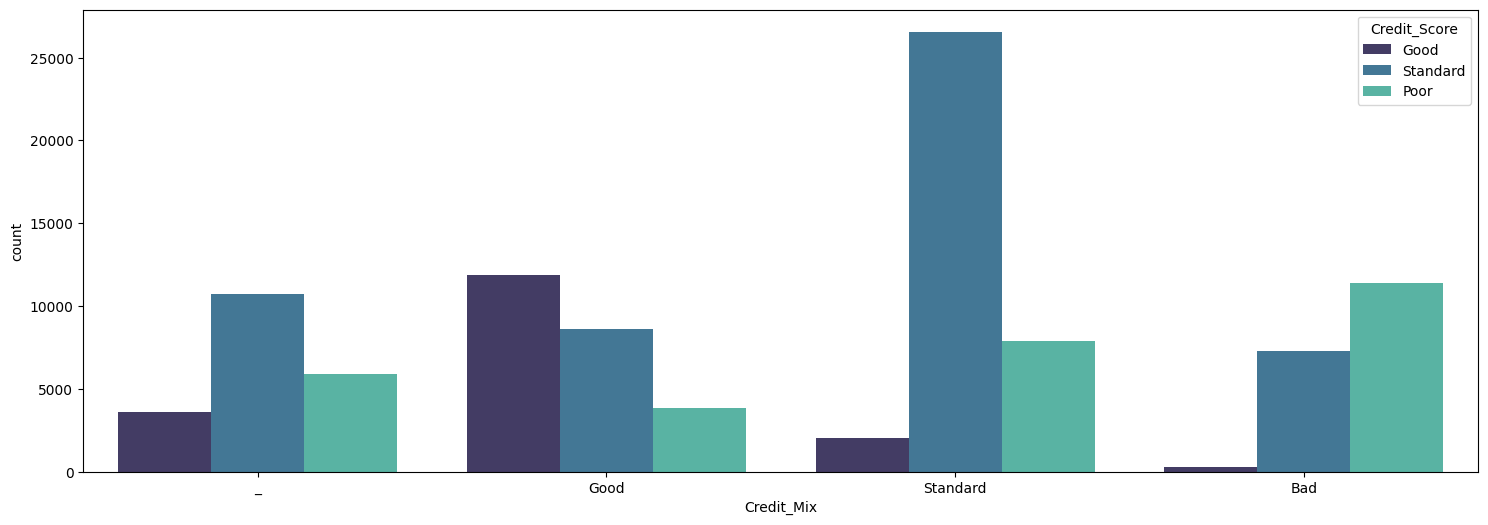

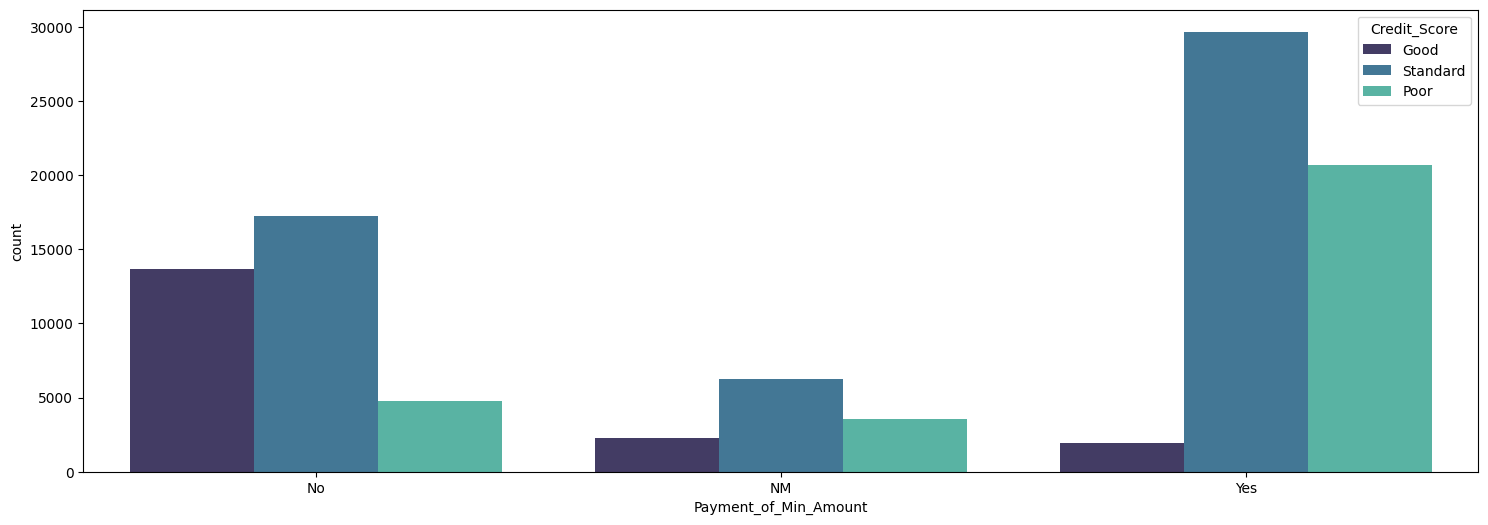

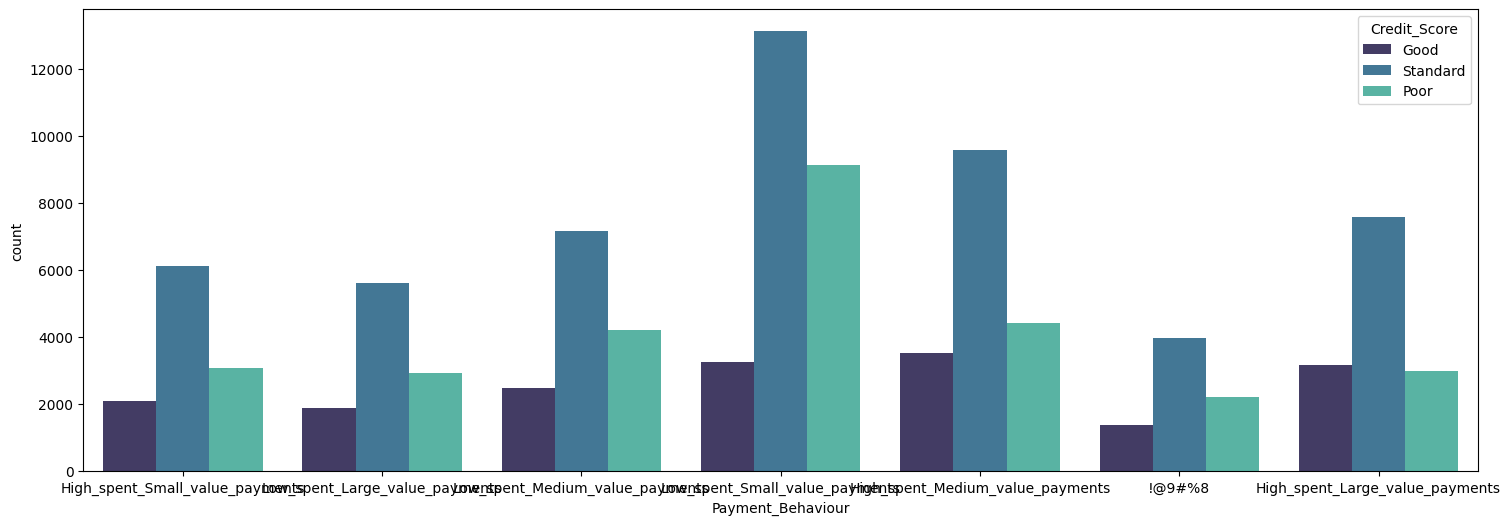

In [12]:
for col in objCols:
    plt.figure(figsize=(18,6))
    sns.countplot(x=col,data=data, palette="mako", hue="Credit_Score")
    plt.show()

In [13]:
rows = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
pd.set_option('mode.chained_assignment',None)

In [14]:
for row in rows:
    data[row] = data[row].str.replace(r'_+', '')

In [15]:
for row in rows:
    data[row] = pd.to_numeric(data[row], errors='coerce')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

# Handle missing values

In [17]:
data.dropna(thresh=26, inplace=True)

In [18]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         8280
Age                          3971
SSN                             0
Occupation                      0
Annual_Income                5689
Monthly_Inhand_Salary       12622
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3867
Type_of_Loan                 9517
Delay_from_due_date             0
Num_of_Delayed_Payment       8009
Changed_Credit_Limit         1659
Num_Credit_Inquiries         1542
Credit_Mix                      0
Outstanding_Debt              802
Credit_Utilization_Ratio        0
Credit_History_Age           7413
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      7221
Payment_Behaviour               0
Monthly_Balance               997
Credit_Score                    0
dtype: int64

## 1,744 missing Rows were removed to handle some missing values 1.7%

In [19]:
data = data[['Month', 'Age', 'Occupation','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']]

<Axes: >

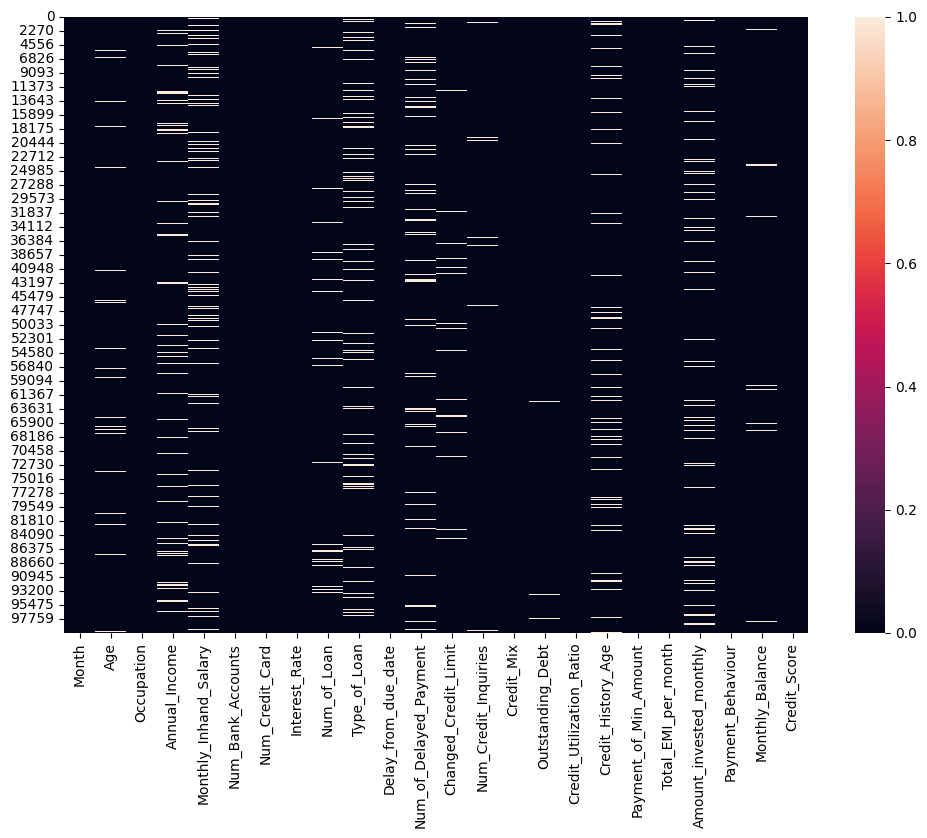

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull())

## Handle Monthly_Inhand_Salary missing values

<Figure size 1200x800 with 0 Axes>

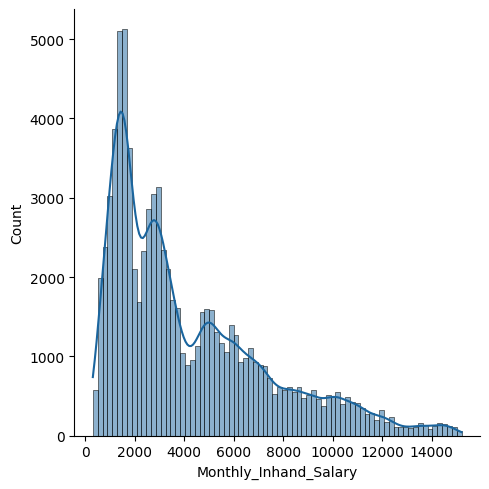

In [21]:
plt.figure(figsize=(12,8))
sns.displot(data=data, x="Monthly_Inhand_Salary", kde=True, color="#1a659e")

In [22]:
fill_list = data['Monthly_Inhand_Salary'].dropna().tolist()
data['Monthly_Inhand_Salary'] = data['Monthly_Inhand_Salary'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

<Figure size 1200x800 with 0 Axes>

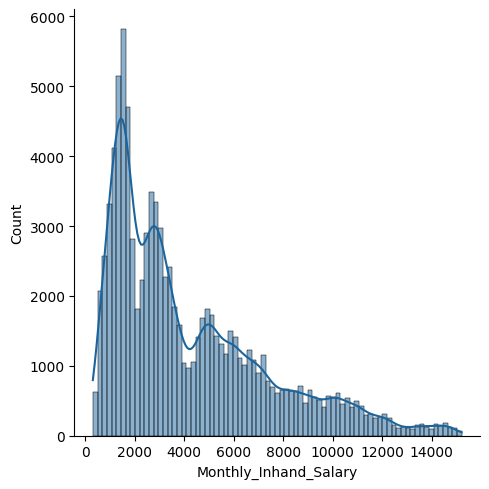

In [23]:
plt.figure(figsize=(12,8))
sns.displot(data=data, x="Monthly_Inhand_Salary", kde=True, color="#1a659e")

## Handle Type_of_Loan missing values

In [24]:
fill_list = data['Type_of_Loan'].dropna().tolist()
data['Type_of_Loan'] = data['Type_of_Loan'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Num_of_Delayed_Payment missing values

In [25]:
fill_list = data['Num_of_Delayed_Payment'].dropna().tolist()
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Changed_Credit_Limit missing values

In [26]:
fill_list = data['Changed_Credit_Limit'].dropna().tolist()
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Num_Credit_Inquiries missing values

In [27]:
fill_list = data['Num_Credit_Inquiries'].dropna().tolist()
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Credit_History_Age missing values

In [28]:
fill_list = data['Credit_History_Age'].dropna().tolist()
data['Credit_History_Age'] = data['Credit_History_Age'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Amount_invested_monthly missing values

In [29]:
fill_list = data['Amount_invested_monthly'].dropna().tolist()
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Monthly_Balance missing values

In [30]:
fill_list = data['Monthly_Balance'].dropna().tolist()
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

<Axes: >

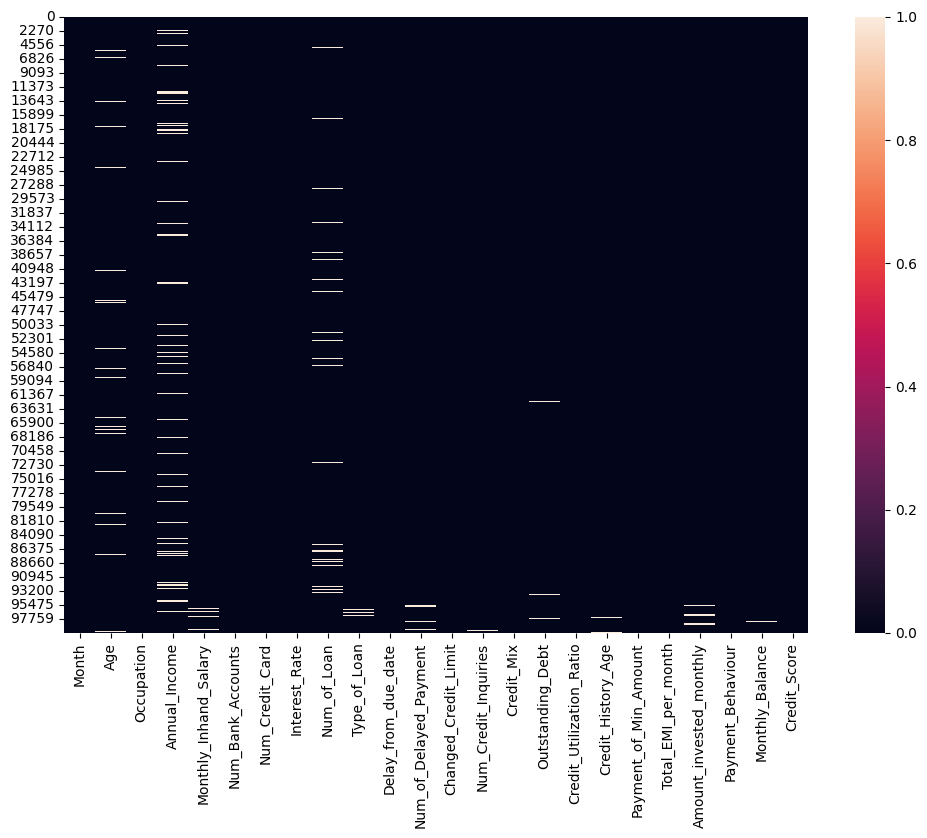

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull())

In [32]:
data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
2,March,-500.0,Scientist,19114.12,1600.767500,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.0,Scientist,19114.12,2385.025000,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,June,23.0,Scientist,19114.12,3188.844167,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,May,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,June,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2.0,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,July,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [33]:
data.dropna(thresh=24, inplace=True)

In [34]:
data.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [35]:
data.shape

(79502, 24)

## 2486 missing Rows were removed to handle some outliers 2.5%

# Handle Outliers Values

In [36]:
numCols = data.select_dtypes([np.number]).columns

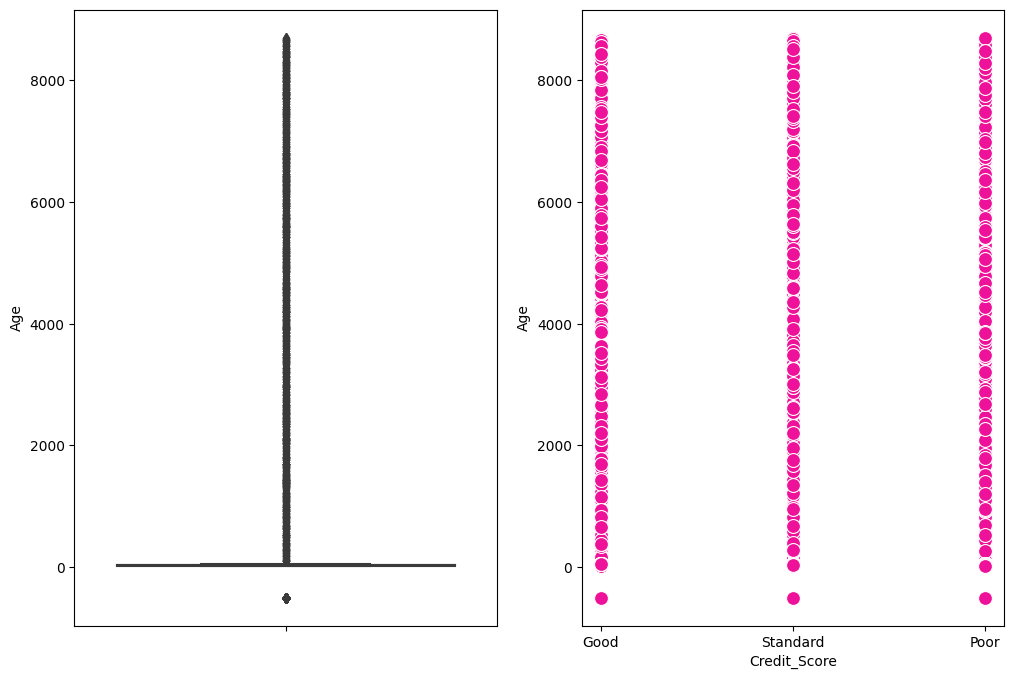

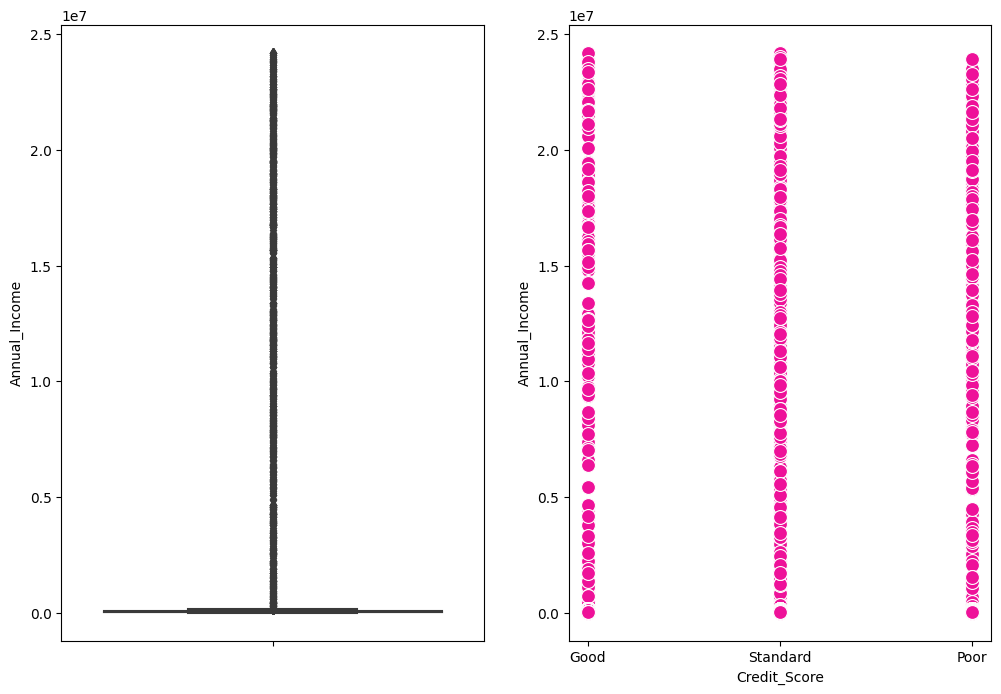

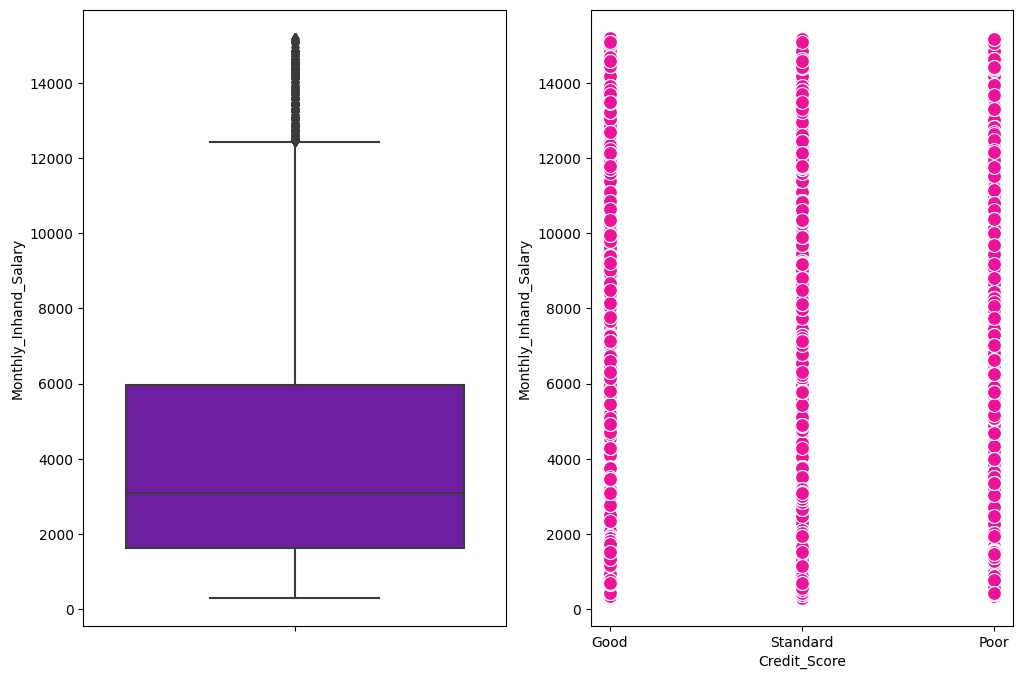

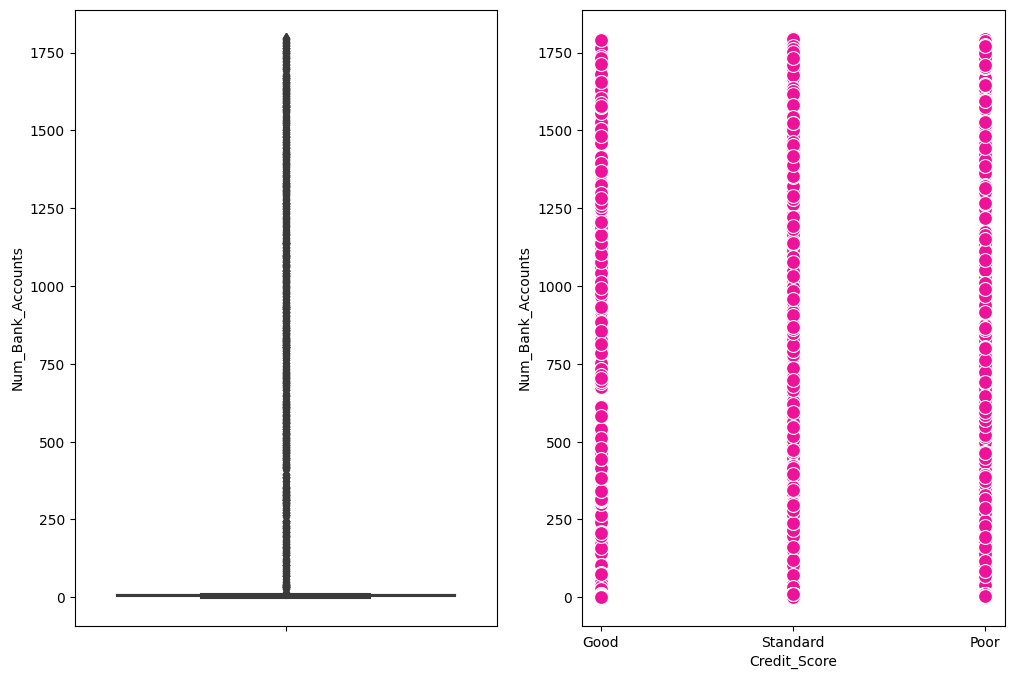

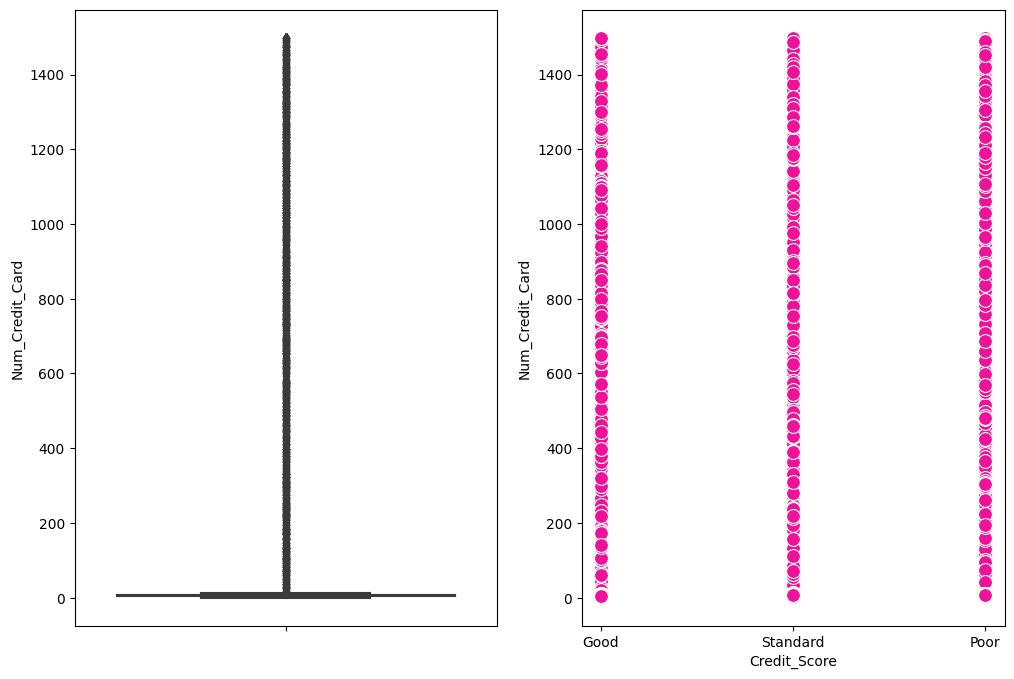

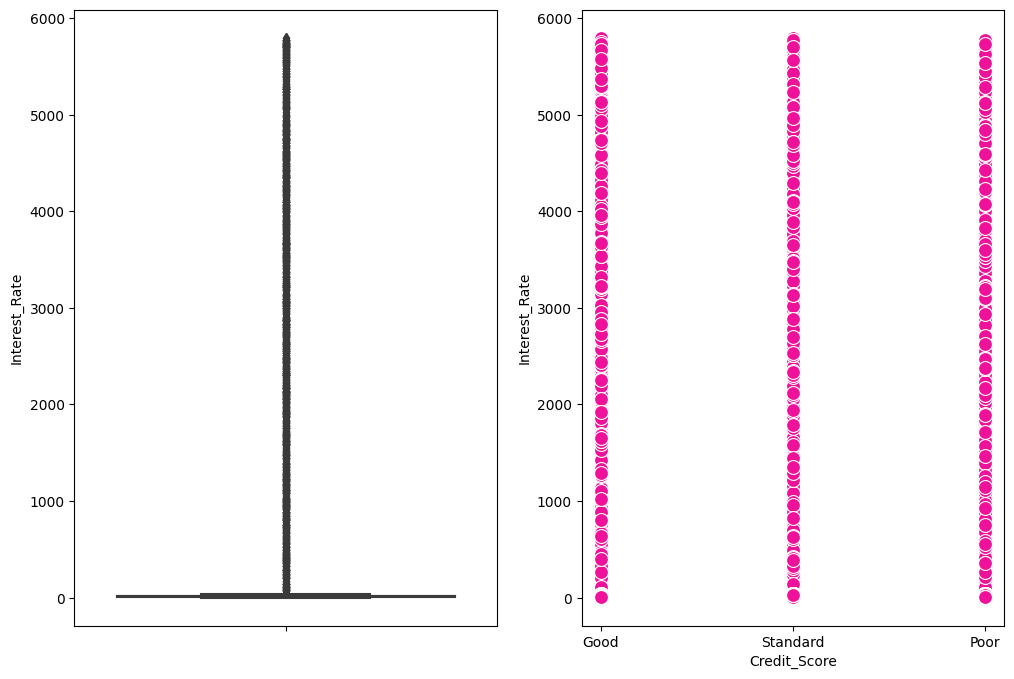

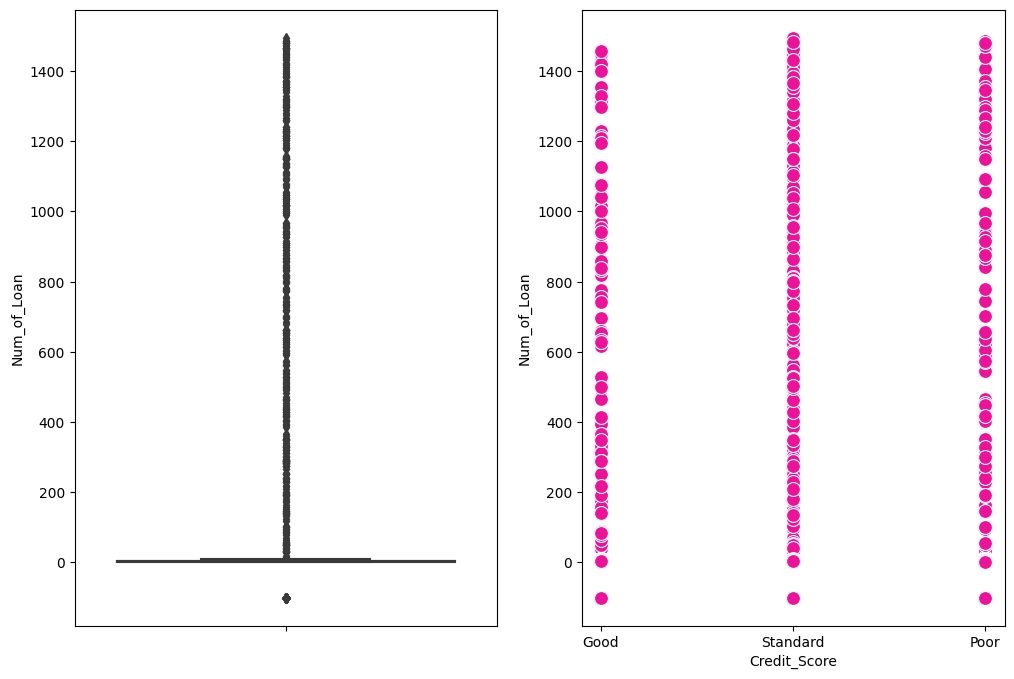

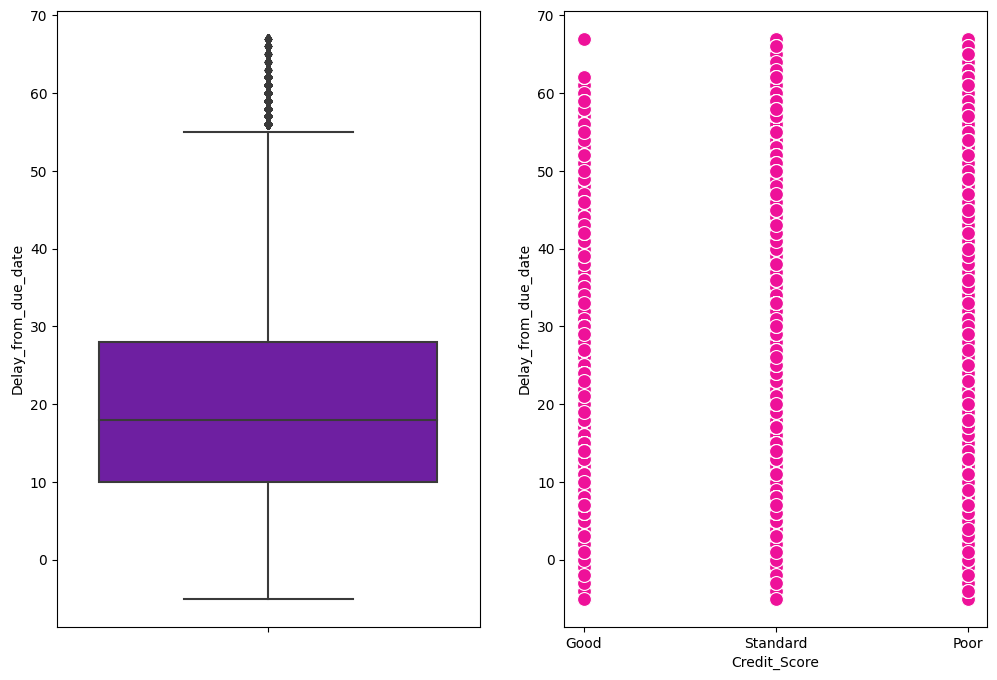

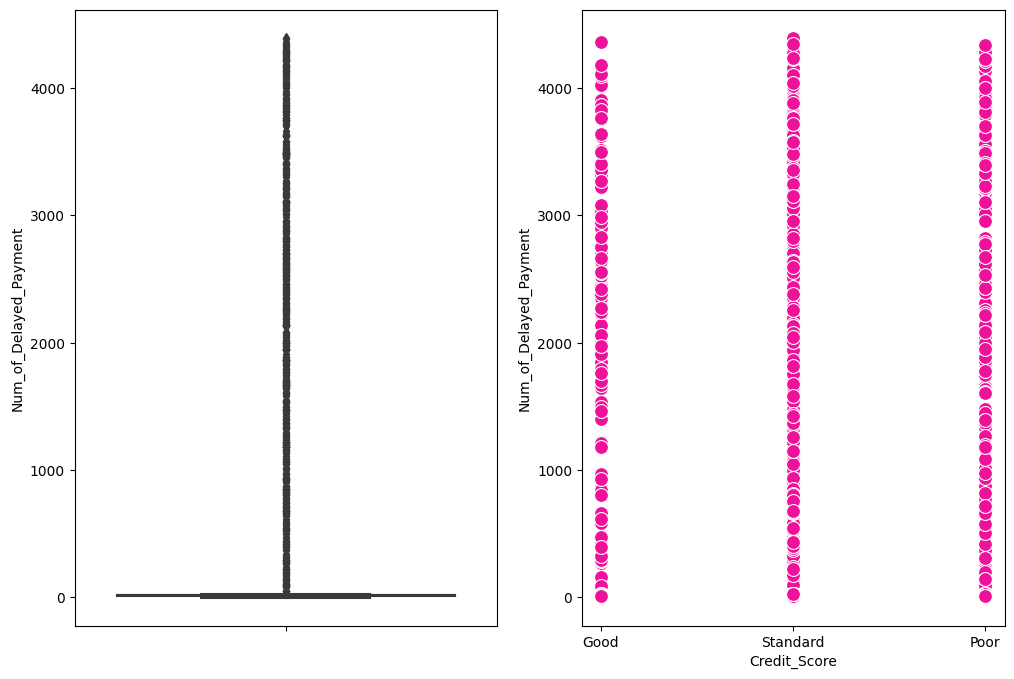

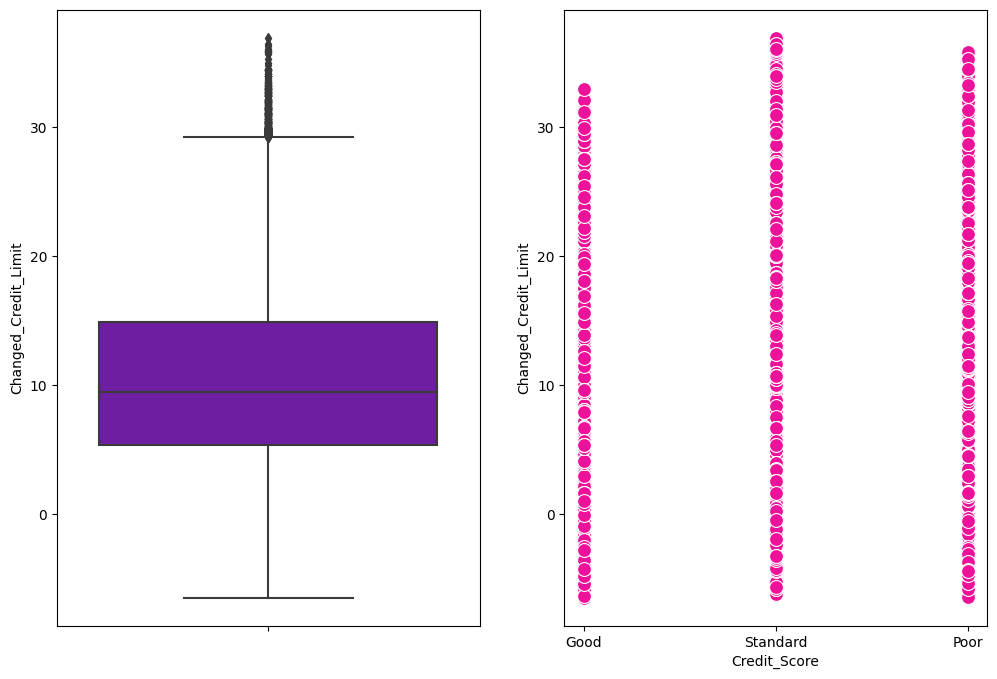

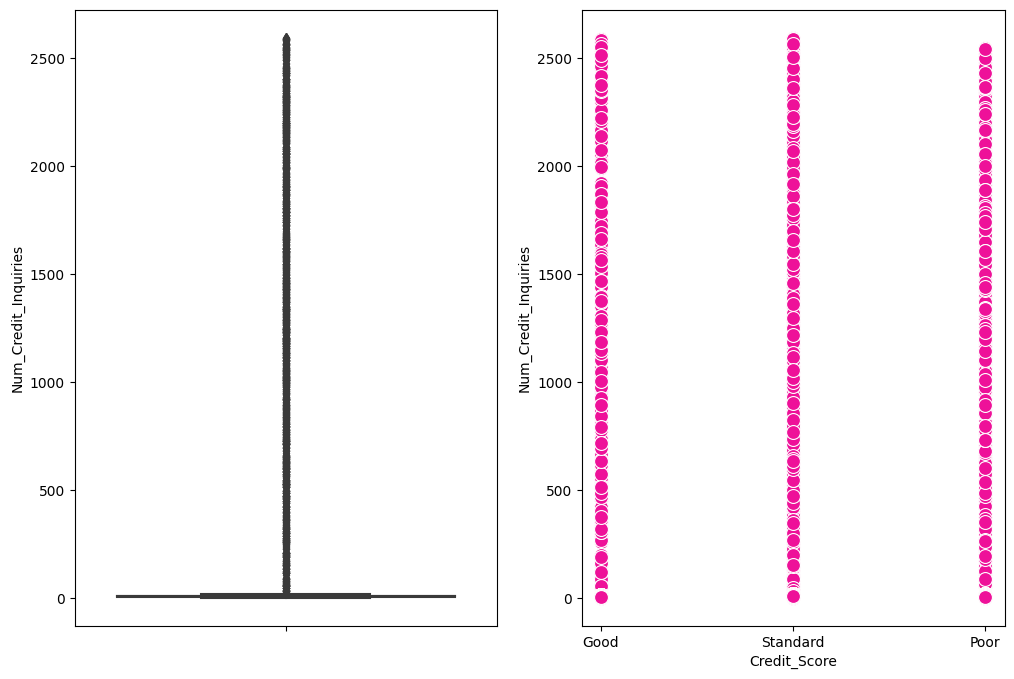

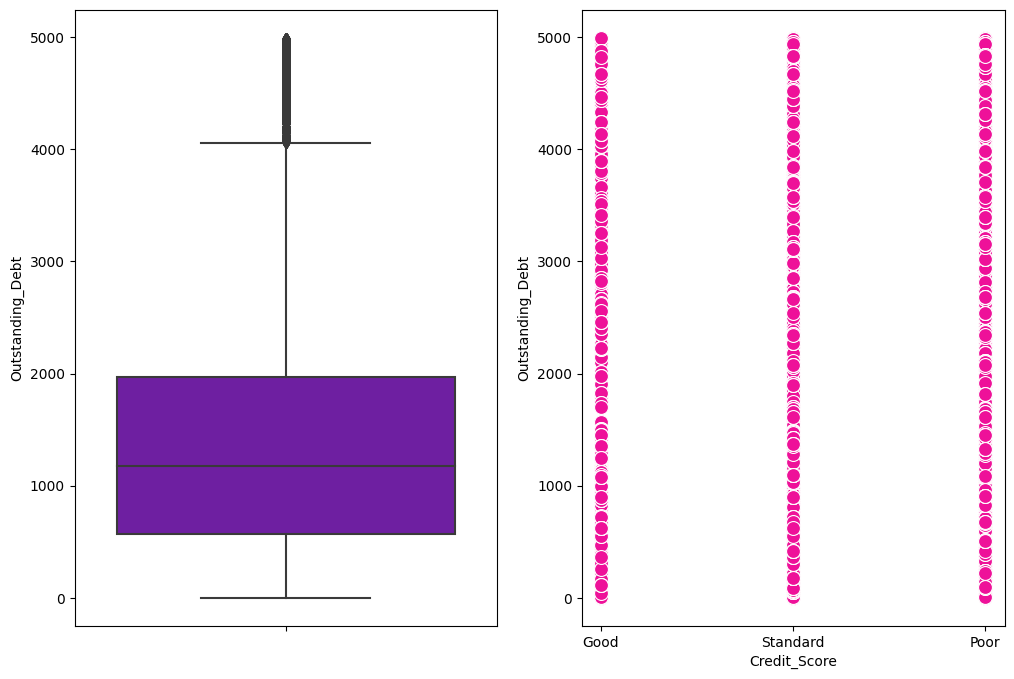

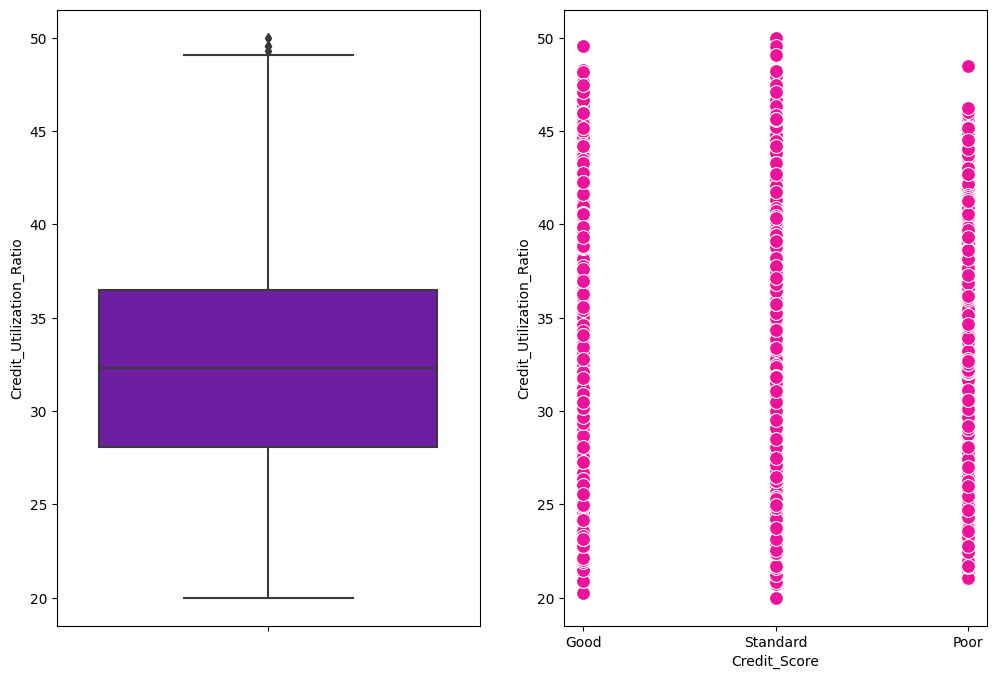

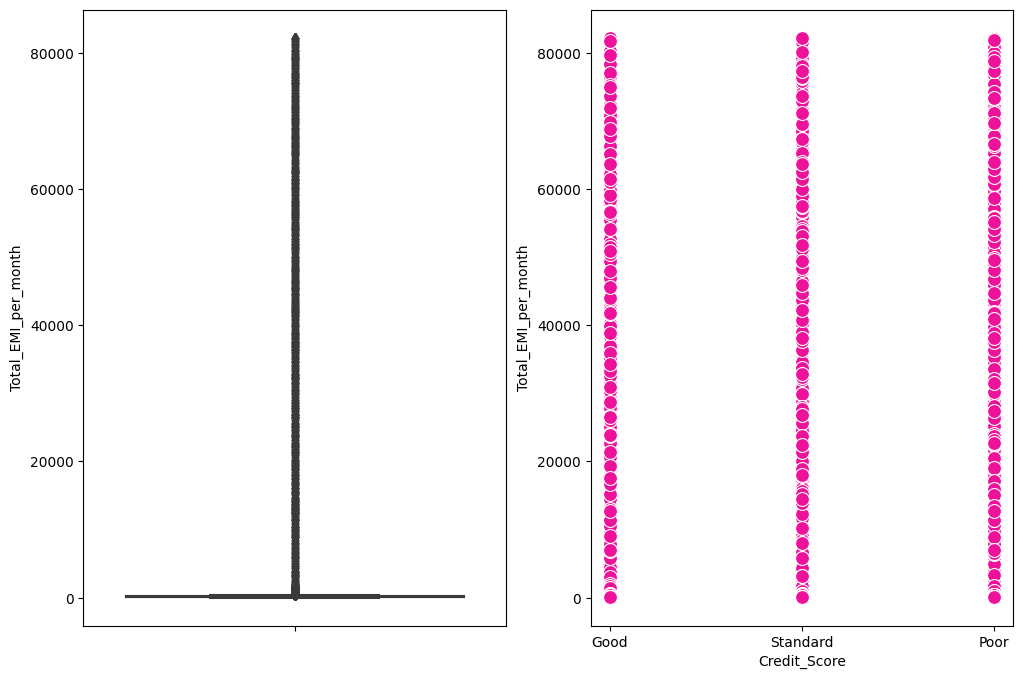

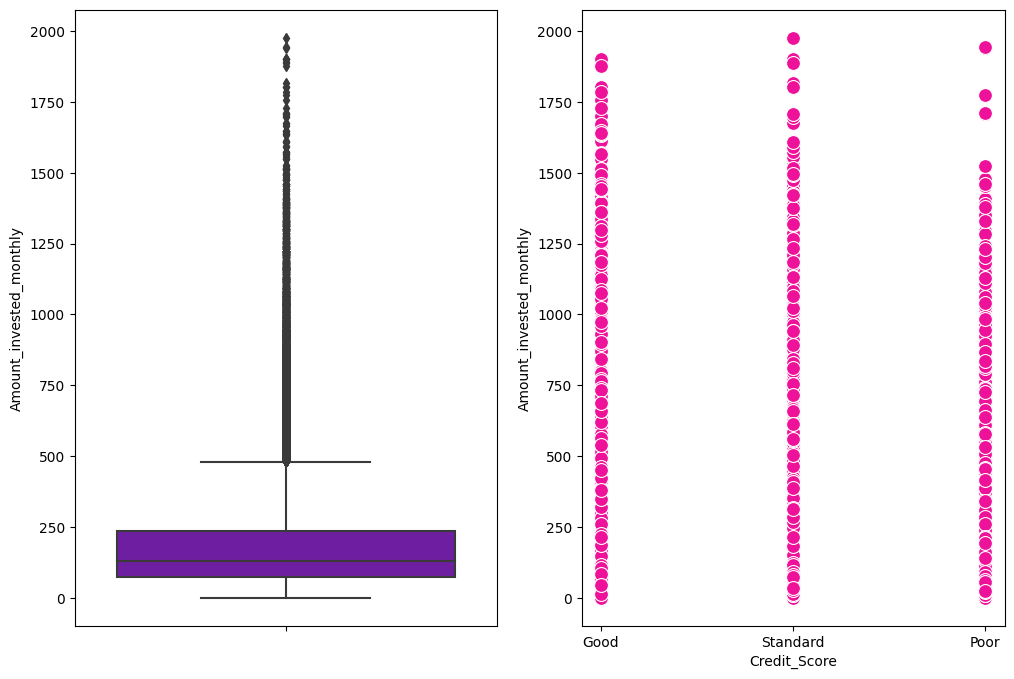

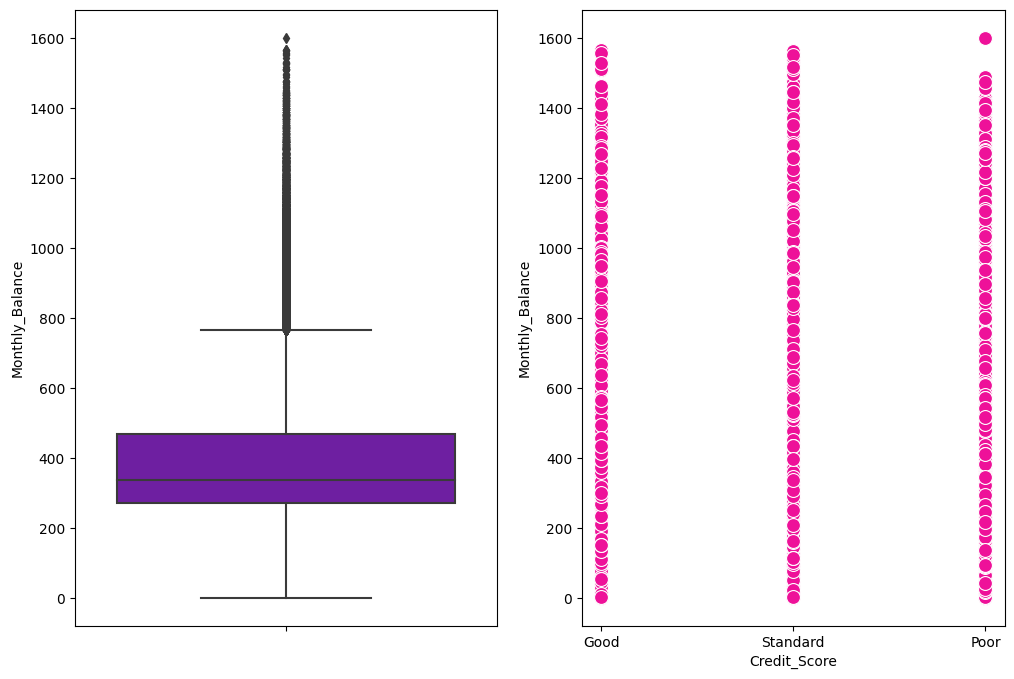

In [37]:
for col in numCols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=data, y=col, ax=ax[0], color='#7209b7')
    sns.scatterplot(data=data,x = 'Credit_Score', s = 100, y=col, ax=ax[1], color ='#ee1199')
    plt.show()

## Handle Age Outliers  Values

In [38]:
((data['Age'] <= 100) & (data['Age'] >= 0)).value_counts()

Age
True     77241
False     2261
Name: count, dtype: int64

In [39]:
data = data[(data['Age'] <= 100) & (data['Age'] >= 0)]

## Handle Annual_Income Outliers  Values

In [40]:
(data['Annual_Income'] <= 300000).value_counts()

Annual_Income
True     76454
False      787
Name: count, dtype: int64

In [41]:
data = data[(data['Annual_Income'] <= 300000)]

## Handle Monthly_Inhand_Salary Outliers  Values

In [42]:
(data['Monthly_Inhand_Salary'] <= 15000).value_counts()

Monthly_Inhand_Salary
True     76393
False       61
Name: count, dtype: int64

In [43]:
data = data[(data['Monthly_Inhand_Salary'] <= 15000)]

## Handle Num_Bank_Accounts Outliers Values

In [44]:
(data['Num_Bank_Accounts'] <= 750).value_counts()

Num_Bank_Accounts
True     75794
False      599
Name: count, dtype: int64

In [45]:
data = data[(data['Num_Bank_Accounts'] <= 750)]

## Handle Num_Credit_Card Outliers  Values

In [46]:
(data['Num_Credit_Card'] <= 1000).value_counts()

Num_Credit_Card
True     75194
False      600
Name: count, dtype: int64

In [47]:
data = data[(data['Num_Credit_Card'] <= 1000)]

## Handle Interest_Rate Outliers  Values

In [48]:
(data['Interest_Rate'] <= 5000).value_counts()

Interest_Rate
True     75000
False      194
Name: count, dtype: int64

In [49]:
data = data[(data['Interest_Rate'] <= 5000)]

## Handle Num_of_Loan Outliers  Values

In [50]:
(data['Num_of_Loan'] <= 1100).value_counts()

Num_of_Loan
True     74899
False      101
Name: count, dtype: int64

In [51]:
data = data[(data['Num_of_Loan'] <= 1100)]

## Handle Delay_from_due_date Outliers Values

In [52]:
(data['Delay_from_due_date'] <= 65).value_counts()

Delay_from_due_date
True     74853
False       46
Name: count, dtype: int64

In [53]:
data = data[(data['Delay_from_due_date'] <= 65)]

## Handle Num_of_Delayed_Payment Outliers  Values

In [54]:
(data['Num_of_Delayed_Payment'] <= 1000).value_counts()

Num_of_Delayed_Payment
True     74394
False      459
Name: count, dtype: int64

In [55]:
data = data[(data['Num_of_Delayed_Payment'] <= 1000)]

## Handle Changed_Credit_Limit Outliers  Values

In [56]:
(data['Changed_Credit_Limit'] <= 30).value_counts()

Changed_Credit_Limit
True     74197
False      197
Name: count, dtype: int64

In [57]:
data = data[(data['Changed_Credit_Limit'] <= 30)]

## Handle Num_Credit_Inquiries Outliers  Values

In [58]:
(data['Num_Credit_Inquiries'] <= 2400).value_counts()

Num_Credit_Inquiries
True     74123
False       74
Name: count, dtype: int64

In [59]:
data = data[(data['Num_Credit_Inquiries'] <= 2400)]

## Handle Outstanding_Debt Outliers  Values

In [60]:
(data['Outstanding_Debt'] <= 4950).value_counts()

Outstanding_Debt
True     73886
False      237
Name: count, dtype: int64

In [61]:
data = data[(data['Outstanding_Debt'] <= 4950)]

## Handle Credit_Utilization_Ratio Outliers  Values

In [62]:
(data['Credit_Utilization_Ratio'] <= 45).value_counts()

Credit_Utilization_Ratio
True     73782
False      104
Name: count, dtype: int64

In [63]:
data = data[(data['Credit_Utilization_Ratio'] <= 45)]

## Handle Total_EMI_per_month Outliers  Values

In [64]:
(data['Total_EMI_per_month'] <= 75000).value_counts()

Total_EMI_per_month
True     73577
False      205
Name: count, dtype: int64

In [65]:
data = data[(data['Total_EMI_per_month'] <= 75000)]

## Handle Amount_invested_monthly Outliers  Values

In [66]:
(data['Amount_invested_monthly'] <= 9000).value_counts()

Amount_invested_monthly
True    73577
Name: count, dtype: int64

## Amount_invested_monthly outliers ignored over 10% of data

## Handle Monthly_Balance Outliers  Values

In [67]:
(data['Monthly_Balance'] > -1).value_counts()

Monthly_Balance
True    73577
Name: count, dtype: int64

In [68]:
data = data[(data['Monthly_Balance'] > -1)]

# Encode categorical values

In [69]:
data.select_dtypes(['object']).columns

Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [70]:
Month_le = le()
Occupation_le = le()
Type_of_Loan_le = le()
Credit_Mix_le = le()
Credit_History_Age_le = le()
Payment_of_Min_Amount_le = le()
Payment_Behaviour_le = le()
Credit_Score_le = le()

In [71]:
data['Month'] = Month_le.fit_transform(data['Month'])
data['Occupation'] = Occupation_le.fit_transform(data['Occupation'])
data['Type_of_Loan'] = Type_of_Loan_le.fit_transform(data['Type_of_Loan'])
data['Credit_Mix'] = Credit_Mix_le.fit_transform(data['Credit_Mix'])
data['Credit_History_Age'] = Credit_History_Age_le.fit_transform(data['Credit_History_Age'])
data['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(data['Payment_of_Min_Amount'])
data['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(data['Payment_Behaviour'])
data['Credit_Score'] = Credit_Score_le.fit_transform(data['Credit_Score'])

# Correlation

<Axes: >

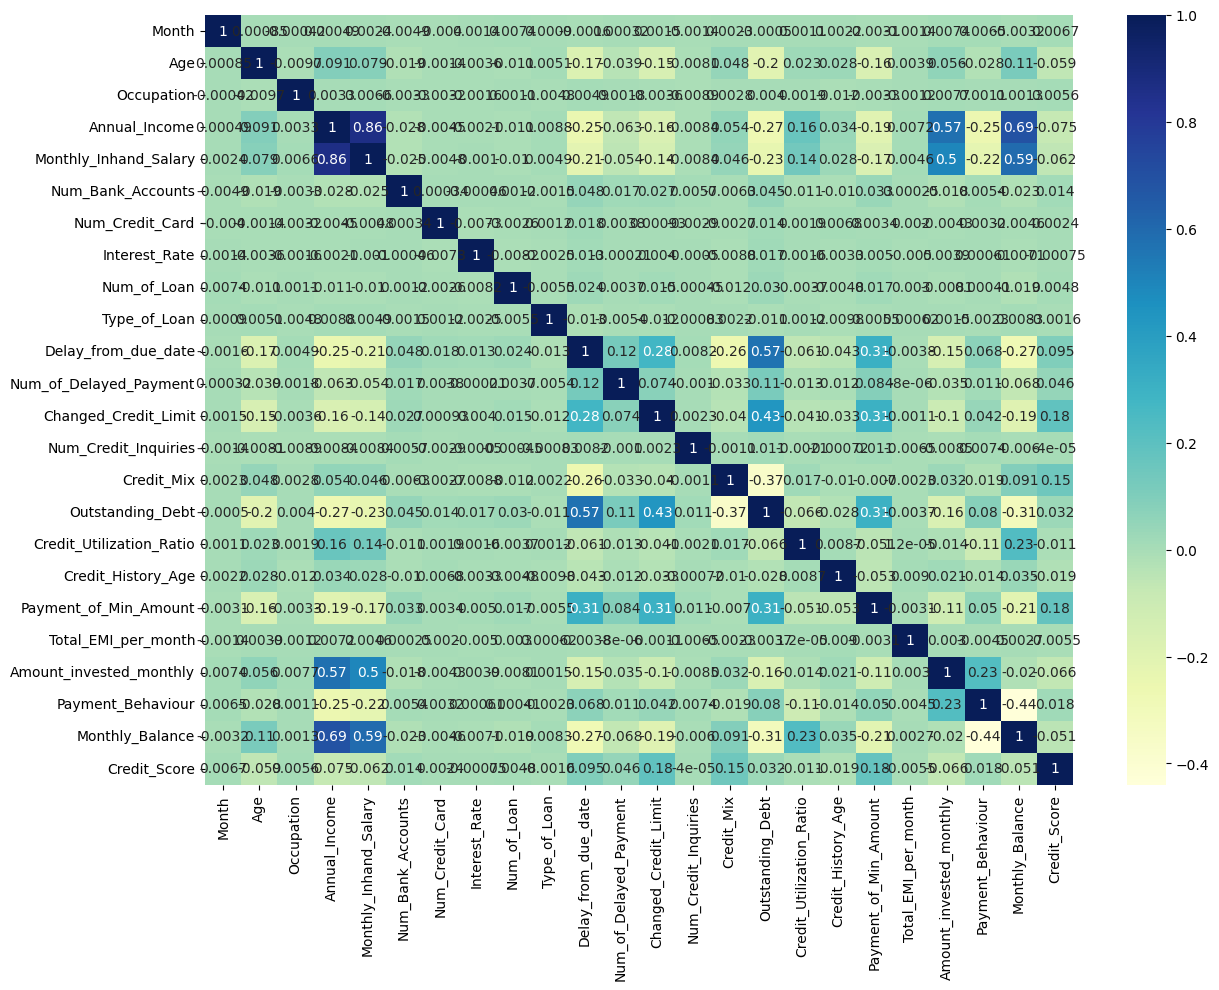

In [72]:
plt.figure(figsize = (14,10))
sns.heatmap(data.corr() , annot = True , cmap = "YlGnBu")

# Feature Selection

In [73]:
round(abs(data.corr()['Credit_Score']*100).sort_values(ascending=False), 2)

Credit_Score                100.00
Changed_Credit_Limit         18.48
Payment_of_Min_Amount        17.86
Credit_Mix                   14.91
Delay_from_due_date           9.48
Annual_Income                 7.51
Amount_invested_monthly       6.56
Monthly_Inhand_Salary         6.22
Age                           5.92
Monthly_Balance               5.09
Num_of_Delayed_Payment        4.65
Outstanding_Debt              3.24
Credit_History_Age            1.91
Payment_Behaviour             1.79
Num_Bank_Accounts             1.39
Credit_Utilization_Ratio      1.14
Month                         0.67
Occupation                    0.56
Total_EMI_per_month           0.55
Num_of_Loan                   0.48
Num_Credit_Card               0.24
Type_of_Loan                  0.16
Interest_Rate                 0.07
Num_Credit_Inquiries          0.00
Name: Credit_Score, dtype: float64

<Axes: >

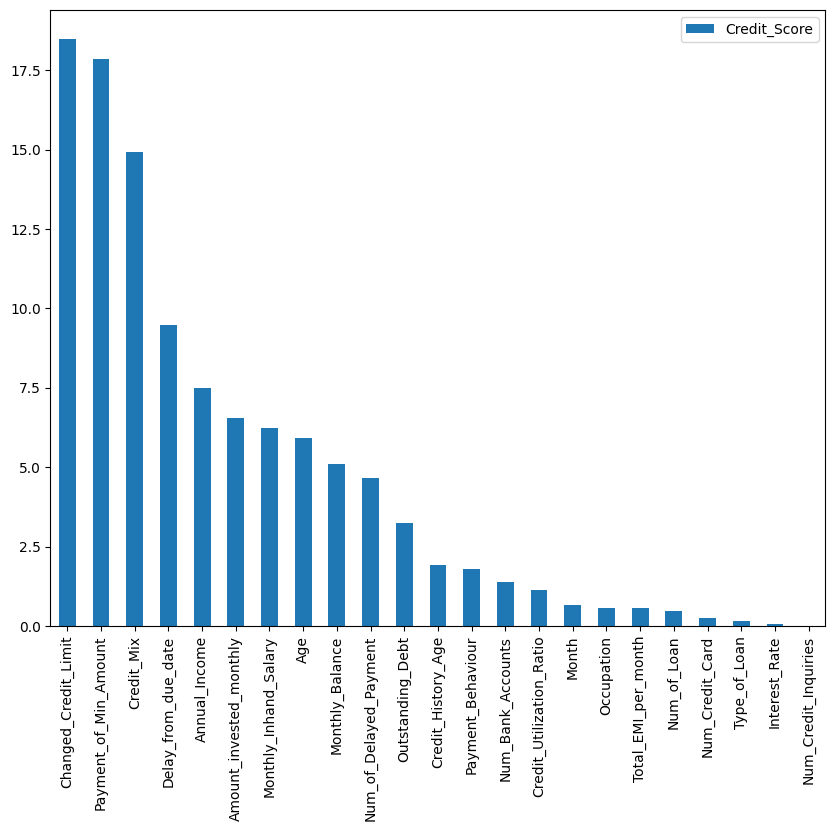

In [74]:
pd.DataFrame(abs(data.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

In [75]:
mdf = data[['Credit_Score','Changed_Credit_Limit', 'Payment_of_Min_Amount', 'Credit_Mix', 'Delay_from_due_date', 'Annual_Income', 'Monthly_Inhand_Salary', 'Age', 'Monthly_Balance', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Payment_Behaviour', 'Credit_History_Age', 'Num_Bank_Accounts', 'Credit_Utilization_Ratio']]

# Modeling

In [76]:
x = mdf.drop(['Credit_Score'] , axis = 1).values
y = mdf['Credit_Score' ].values

# Split Data

In [77]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)
[x_train.shape, y_train.shape]

[(55182, 14), (55182,)]

# Data Scaling using Robust Scaler

In [78]:
ro_scaler = rbScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
[x_train.shape, x_test.shape]

[(55182, 14), (18395, 14)]

# Logistic Regression

In [79]:
lgr = lgrClassifier(C = 100)

In [80]:
lgr.fit(x_train , y_train)

LogisticRegression(C=100)

In [81]:
lgr_score = lgr.score(x_train , y_train)

In [82]:
lgr_score_t = lgr.score(x_test , y_test)

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Fit the Logistic Regression model
lgr = lgrClassifier(C=100)
lgr.fit(x_train, y_train)

# Predictions
y_pred_lgr_train = lgr.predict(x_train)
y_pred_lgr_test = lgr.predict(x_test)

# Calculate precision, recall, and F1-score
precision_lgr = precision_score(y_test, y_pred_lgr_test, average='micro')
recall_lgr = recall_score(y_test, y_pred_lgr_test, average='micro')
f1_lgr = f1_score(y_test, y_pred_lgr_test, average='micro')

# Confusion matrix
conf_matrix_lgr = confusion_matrix(y_test, y_pred_lgr_test)

print("Precision for Logistic Regression:", precision_lgr)
print("Recall for Logistic Regression:", recall_lgr)
print("F1-score for Logistic Regression:", f1_lgr)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lgr)


Precision for Logistic Regression: 0.5985322098396303
Recall for Logistic Regression: 0.5985322098396303
F1-score for Logistic Regression: 0.5985322098396303
Confusion Matrix for Logistic Regression:
[[1177   43 1972]
 [ 243 2179 2930]
 [ 972 1225 7654]]


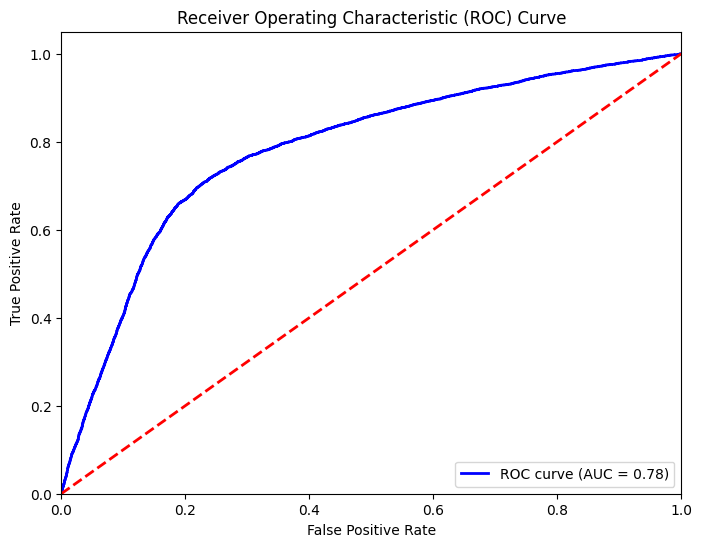

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming the positive class is labeled as 1, and other classes are labeled as 0
binary_y_test = (y_test == 1)

# Get predicted probabilities for the positive class
y_prob_lgr = lgr.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(binary_y_test, y_prob_lgr)

# Compute ROC AUC
roc_auc = roc_auc_score(binary_y_test, y_prob_lgr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# KNN

In [86]:
knn = knnClassifier(n_neighbors=5)

In [87]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [88]:
knn_score = knn.score(x_train , y_train)

In [89]:
knn_score_t = knn.score(x_test , y_test)

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Fit the KNN classifier
knn = knnClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predictions
y_pred_knn_train = knn.predict(x_train)
y_pred_knn_test = knn.predict(x_test)

# Calculate precision, recall, and F1-score
precision_knn = precision_score(y_test, y_pred_knn_test, average='micro')
recall_knn = recall_score(y_test, y_pred_knn_test, average='micro')
f1_knn = f1_score(y_test, y_pred_knn_test, average='micro')

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn_test)

print("Precision for KNN:", precision_knn)
print("Recall for KNN:", recall_knn)
print("F1-score for KNN:", f1_knn)
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)


Precision for KNN: 0.6437618918184289
Recall for KNN: 0.6437618918184289
F1-score for KNN: 0.6437618918184289
Confusion Matrix for KNN:
[[1860  164 1168]
 [ 498 3131 1723]
 [1446 1554 6851]]


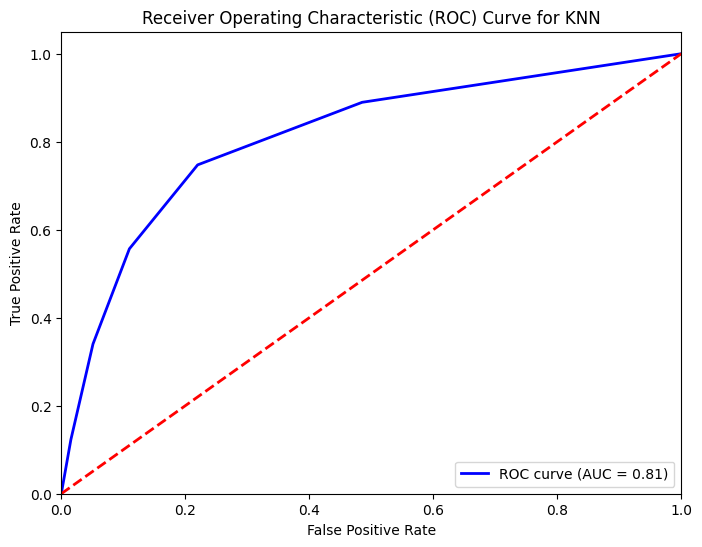

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming the positive class is labeled as 1, and other classes are labeled as 0
binary_y_test = (y_test == 1)

# Get predicted probabilities for the positive class
y_prob_knn = knn.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(binary_y_test, y_prob_knn)

# Compute ROC AUC
roc_auc = roc_auc_score(binary_y_test, y_prob_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()


# Decision Tree Classifier

In [92]:
dt = dtClassifier(max_features=14, max_depth=8)

In [93]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=8, max_features=14)

In [94]:
dt_score = dt.score(x_train , y_train)

In [95]:
dt_score_t = dt.score(x_test , y_test)

In [106]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Fit the custom Decision Tree classifier
dt = dtClassifier(max_features=14, max_depth=8)
dt.fit(x_train, y_train)

# Predictions
y_pred_dt_train = dt.predict(x_train)
y_pred_dt_test = dt.predict(x_test)

# Calculate precision, recall, and F1-score for Decision Tree
precision_dt = precision_score(y_test, y_pred_dt_test, average='micro')
recall_dt = recall_score(y_test, y_pred_dt_test, average='micro')
f1_dt = f1_score(y_test, y_pred_dt_test, average='micro')

# Confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt_test)

# Print performance metrics for Decision Tree
print("Precision for Decision Tree:", precision_dt)
print("Recall for Decision Tree:", recall_dt)
print("F1-score for Decision Tree:", f1_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)


Precision for Decision Tree: 0.681598260396847
Recall for Decision Tree: 0.681598260396847
F1-score for Decision Tree: 0.681598260396847
Confusion Matrix for Decision Tree:
[[2259  117  816]
 [ 514 3373 1465]
 [1627 1318 6906]]


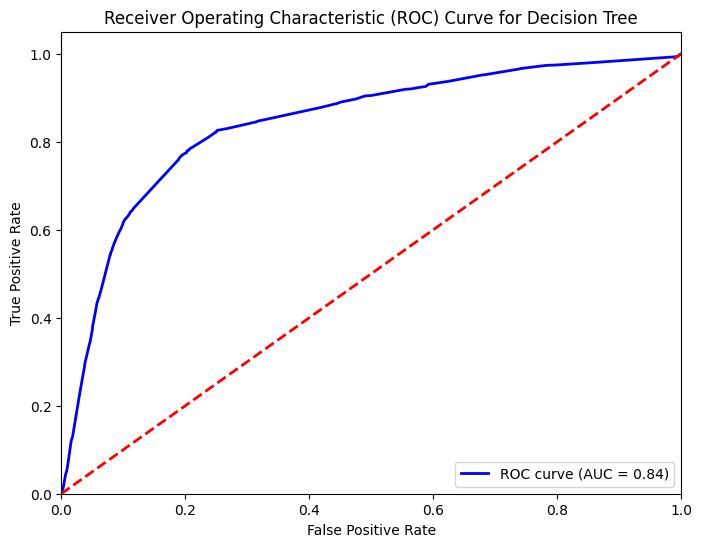

In [110]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_dt = dt.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(binary_y_test, y_prob_dt)

# Compute ROC AUC
roc_auc = roc_auc_score(binary_y_test, y_prob_dt)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


# Random Forest Classifier

In [96]:
rf = rfClassifier(max_features= 14, max_depth= 8)

In [97]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=8, max_features=14)

In [98]:
rf_score = rf.score(x_train , y_train)

In [99]:
rf_score_t = rf.score(x_test , y_test)

In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Fit the custom Random Forest classifier
rf = rfClassifier(max_features=14, max_depth=8)
rf.fit(x_train, y_train)

# Predictions
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

# Calculate precision, recall, and F1-score for Random Forest
precision_rf = precision_score(y_test, y_pred_rf_test, average='micro')
recall_rf = recall_score(y_test, y_pred_rf_test, average='micro')
f1_rf = f1_score(y_test, y_pred_rf_test, average='micro')

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_test)

# Print performance metrics for Random Forest
print("Precision for Random Forest:", precision_rf)
print("Recall for Random Forest:", recall_rf)
print("F1-score for Random Forest:", f1_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)


Precision for Random Forest: 0.6885566730089698
Recall for Random Forest: 0.6885566730089698
F1-score for Random Forest: 0.6885566730089698
Confusion Matrix for Random Forest:
[[2352  108  732]
 [ 516 3456 1380]
 [1707 1286 6858]]


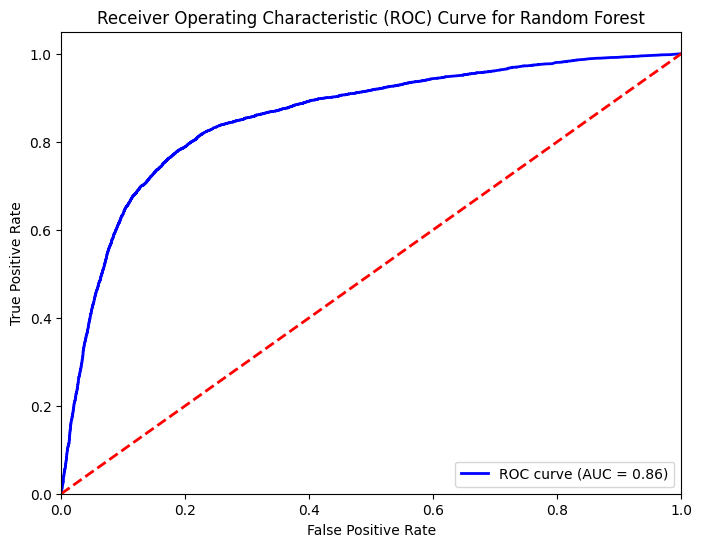

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_rf = rf.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(binary_y_test, y_prob_rf)

# Compute ROC AUC
roc_auc = roc_auc_score(binary_y_test, y_prob_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


# Voting

In [100]:
clf1 = lgrClassifier()
clf2 = knnClassifier(n_neighbors=4)

clf3 = rfClassifier(n_estimators=3 , max_depth=6  , max_features=4)

In [101]:
v_clf = voClassifier(estimators=[("LogisticRegression" , clf1) , ('KNeighborsClassifier' , clf2) ,
                                     ("RandomForestClassifier" , clf3)] , voting = "hard")

In [102]:
v_clf.fit(x_train , y_train)

C:\Users\Lavanya Tetakali\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=4)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(max_depth=6,
                                                     max_features=4,
                                                     n_estimators=3))])

In [103]:
v_clf_score = v_clf.score(x_train , y_train)

In [104]:
v_clf_score_t = v_clf.score(x_test , y_test)

In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predictions
y_pred_v_clf_train = v_clf.predict(x_train)
y_pred_v_clf_test = v_clf.predict(x_test)

# Calculate precision, recall, and F1-score for the voting classifier
precision_v_clf = precision_score(y_test, y_pred_v_clf_test, average='micro')
recall_v_clf = recall_score(y_test, y_pred_v_clf_test, average='micro')
f1_v_clf = f1_score(y_test, y_pred_v_clf_test, average='micro')

# Confusion matrix for the voting classifier
conf_matrix_v_clf = confusion_matrix(y_test, y_pred_v_clf_test)

# Print performance metrics for the voting classifier
print("Precision for Voting Classifier:", precision_v_clf)
print("Recall for Voting Classifier:", recall_v_clf)
print("F1-score for Voting Classifier:", f1_v_clf)
print("Confusion Matrix for Voting Classifier:")
print(conf_matrix_v_clf)


Precision for Voting Classifier: 0.6633324272900245
Recall for Voting Classifier: 0.6633324272900245
F1-score for Voting Classifier: 0.6633324272900245
Confusion Matrix for Voting Classifier:
[[1856   37 1299]
 [ 438 3293 1621]
 [1345 1453 7053]]


# Comparison

In [105]:
models = ['logistic regression', 'knn', 'decision tree', 'random forest','voting']
data = [[lgr_score, lgr_score_t],[knn_score, knn_score_t],[dt_score, dt_score_t],[rf_score, rf_score_t],
        [v_clf_score, v_clf_score_t]]
cols = ["Train Score", 'Test Score']
pd.DataFrame(data=data , index= models , columns= cols).sort_values(ascending= False , by = ['Train Score'])

,Train Score,Test Score
knn,0.759722,0.643762
voting,0.716683,0.663332
random forest,0.712134,0.687904
decision tree,0.702004,0.681435
logistic regression,0.604382,0.598532
